# CPI Index Time Series Analysis and Forecasting

## Load and view data


In [1]:
import camelot
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
from pmdarima import auto_arima 
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error


In [54]:
# Convert PDF to CSV
pdf_path = "file path"  


tables = camelot.read_pdf(pdf_path, pages="all", flavor="stream") 
print(tables)

for i, table in enumerate(tables):
    table.to_csv(f"table_{i+1}.csv")
    
output_folder = "/Users/saalihah/Downloads/csv_output"
import os
os.makedirs(output_folder, exist_ok=True)  

for i, table in enumerate(tables):
    table.to_csv(os.path.join(output_folder, f"table_{i+1}.csv"))
    

<TableList n=3>


In [55]:
data1 = pd.read_csv("file path", skiprows=[0], header=[0, 1], decimal='.')
data1.columns = data1.columns.droplevel(0)
data1.head(10)

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Average
0,1980,"2,8","2,8","2,8","2,8","2,9","2,9","3,0","3,0","3,1","3,2","3,2","3,2","3,0"
1,1981,"3,2","3,3","3,3","3,3","3,4","3,4","3,4","3,5","3,6","3,6","3,7","3,7","3,4"
2,1982,"3,7","3,7","3,9","3,9","3,9","3,9","4,0","4,0","4,0","4,1","4,1","4,1","4,0"
3,1983,"4,1","4,3","4,3","4,3","4,4","4,4","4,5","4,5","4,5","4,6","4,7","4,7","4,4"
4,1984,"4,7","4,7","4,7","4,8","4,9","4,9","4,9","5,0","5,1","5,1","5,2","5,3","4,9"
5,1985,"5,3","5,4","5,4","5,6","5,7","5,8","5,8","5,9","5,9","5,9","6,0","6,2","5,8"
6,1986,"6,4","6,4","6,5","6,6","6,6","6,7","6,8","7,0","7,1","7,1","7,2","7,3","6,8"
7,1987,"7,4","7,5","7,6","7,8","7,8","7,8","7,9","8,0","8,2","8,3","8,4","8,4","7,9"
8,1988,"8,4","8,4","8,6","8,7","8,8","8,9","9,0","9,0","9,2","9,3","9,3","9,5","9,0"
9,1989,"9,6","9,6","9,8","10,0","10,2","10,2","10,2","10,4","10,5","10,6","10,8","10,9","10,2"


# Data cleaning 

In [4]:
# Convert to float type
for column in data1.columns:
    if column != 'Year':
        data1[column] = data1[column].str.replace(',', '.').astype(float)



In [5]:
data1 = data1.iloc[:-1]
data1.head(5)

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Average
0,1980,2.8,2.8,2.8,2.8,2.9,2.9,3.0,3.0,3.1,3.2,3.2,3.2,3.0
1,1981,3.2,3.3,3.3,3.3,3.4,3.4,3.4,3.5,3.6,3.6,3.7,3.7,3.4
2,1982,3.7,3.7,3.9,3.9,3.9,3.9,4.0,4.0,4.0,4.1,4.1,4.1,4.0
3,1983,4.1,4.3,4.3,4.3,4.4,4.4,4.5,4.5,4.5,4.6,4.7,4.7,4.4
4,1984,4.7,4.7,4.7,4.8,4.9,4.9,4.9,5.0,5.1,5.1,5.2,5.3,4.9


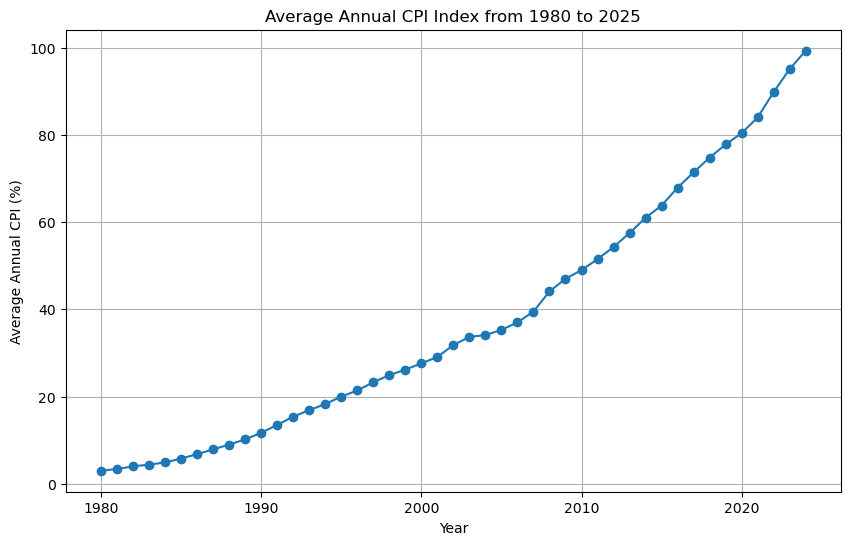

In [40]:
data1['Year'] = pd.to_numeric(data1['Year'])
data1['Average'] = pd.to_numeric(data1['Average'])

plt.figure(figsize=(10, 6))
plt.plot(data1['Year'], data1['Average'], marker='o', linestyle='-')

plt.title('Average Annual CPI Index from 1980 to 2025')
plt.xlabel('Year')
plt.ylabel('Average Annual CPI (%)')
plt.grid(True) 

plt.show()

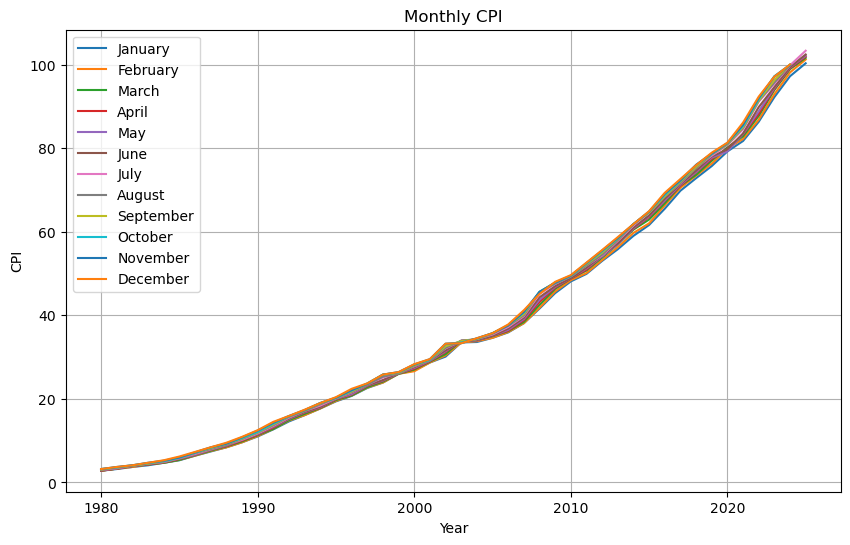

In [45]:
plt.figure(figsize = (10,6))
plt.plot(data1["Year"], data1["Jan"], label = "January")
plt.plot(data1["Year"], data1["Feb"], label = "February")
plt.plot(data1["Year"], data1["Mar"], label = "March")
plt.plot(data1["Year"], data1["Apr"], label = "April")
plt.plot(data1["Year"], data1["May"], label = "May")
plt.plot(data1["Year"], data1["Jun"], label = "June")
plt.plot(data1["Year"], data1["Jul"], label = "July")
plt.plot(data1["Year"], data1["Aug"], label = "August")
plt.plot(data1["Year"], data1["Sep"], label = "September")
plt.plot(data1["Year"], data1["Oct"], label = "October")
plt.plot(data1["Year"], data1["Nov"], label = "November")
plt.plot(data1["Year"], data1["Dec"], label = "December")




plt.xlabel("Year")
plt.ylabel("CPI")
plt.title("Monthly CPI")
plt.grid(True)
plt.legend()

plt.show()

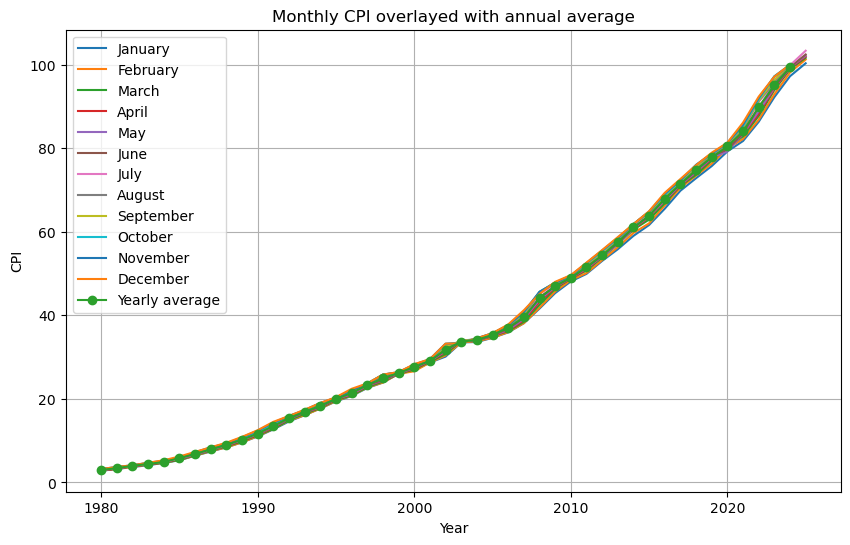

In [43]:
plt.figure(figsize = (10,6))
plt.plot(data1["Year"], data1["Jan"], label = "January")
plt.plot(data1["Year"], data1["Feb"], label = "February")
plt.plot(data1["Year"], data1["Mar"], label = "March")
plt.plot(data1["Year"], data1["Apr"], label = "April")
plt.plot(data1["Year"], data1["May"], label = "May")
plt.plot(data1["Year"], data1["Jun"], label = "June")
plt.plot(data1["Year"], data1["Jul"], label = "July")
plt.plot(data1["Year"], data1["Aug"], label = "August")
plt.plot(data1["Year"], data1["Sep"], label = "September")
plt.plot(data1["Year"], data1["Oct"], label = "October")
plt.plot(data1["Year"], data1["Nov"], label = "November")
plt.plot(data1["Year"], data1["Dec"], label = "December")
plt.plot(data1['Year'], data1['Average'], marker='o', linestyle='-', label = "Yearly average")




plt.xlabel("Year")
plt.ylabel("CPI")
plt.title("Monthly CPI overlayed with annual average")
plt.grid(True)
plt.legend()

plt.show()

### Convert from wide format to long

In [9]:
# data1 is in wide format we make it long format to do time series modeling and convert dates
monthly_data = data1.drop("Average", axis = 1 )

monthly_data_long = monthly_data.melt(id_vars=['Year'], 
                  value_vars=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],
                  var_name='Month', value_name='CPI')
monthly_data_long.head()

month_map = {'Jan':1, 'Feb':2, 'Mar':3, 'Apr':4, 'May':5, 'Jun':6,
             'Jul':7, 'Aug':8, 'Sep':9, 'Oct':10, 'Nov':11, 'Dec':12}
monthly_data_long['Month'] = monthly_data_long['Month'].map(month_map)

monthly_data_long['Date'] = pd.to_datetime(monthly_data_long['Year'].astype(str) + '-' + monthly_data_long['Month'].astype(str) + '-01')


monthly_data_long = monthly_data_long[['Date','CPI']].sort_values('Date').set_index('Date')

print(monthly_data_long.tail(6))

              CPI
Date             
2025-07-01  103.3
2025-08-01    NaN
2025-09-01    NaN
2025-10-01    NaN
2025-11-01    NaN
2025-12-01    NaN


# View change in CPI index 

/var/folders/9g/q1btgy0d1cx10571fvpjrsz80000gn/T/ipykernel_30799/1956320501.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data["CPI_change"] = monthly_data_long["CPI"].diff()
/var/folders/9g/q1btgy0d1cx10571fvpjrsz80000gn/T/ipykernel_30799/1956320501.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data["CPI_change_roll12"] = new_data["CPI_change"].rolling(12).mean()


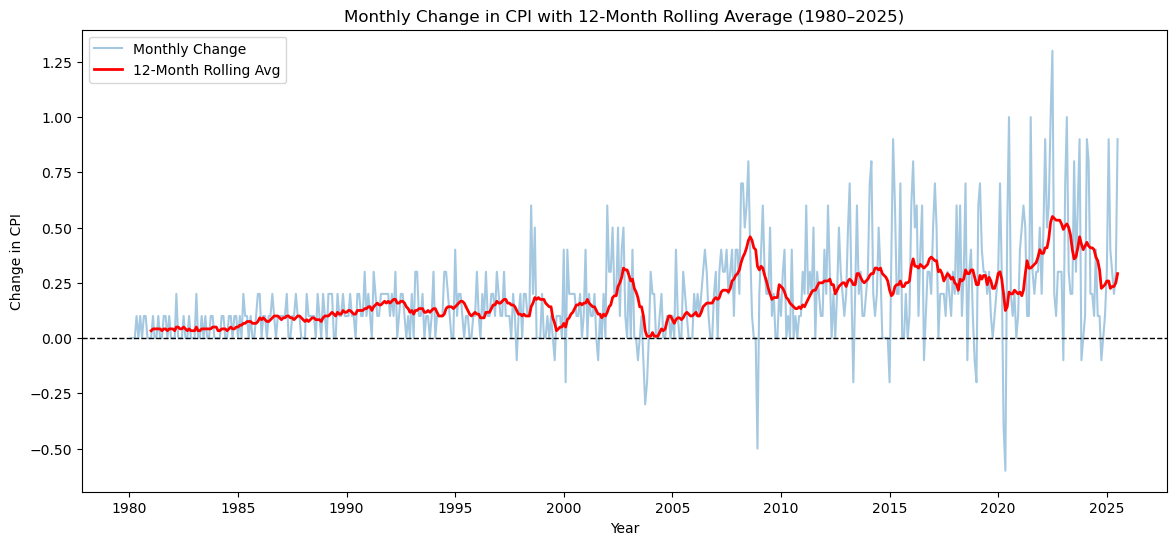

In [10]:
new_data = monthly_data_long[:-5]
new_data["CPI_change"] = monthly_data_long["CPI"].diff()
new_data["CPI_change_roll12"] = new_data["CPI_change"].rolling(12).mean()

plt.figure(figsize=(14,6))
plt.plot(new_data.index, new_data["CPI_change"], alpha=0.4, label="Monthly Change")
plt.plot(new_data.index, new_data["CPI_change_roll12"], color="red", linewidth=2, label="12-Month Rolling Avg")

plt.axhline(0, color="black", linewidth=1, linestyle="--")
plt.title("Monthly Change in CPI with 12-Month Rolling Average (1980–2025)")
plt.xlabel("Year")
plt.ylabel("Change in CPI")
plt.legend()
plt.show()

# Time series analysis using SARIMAX

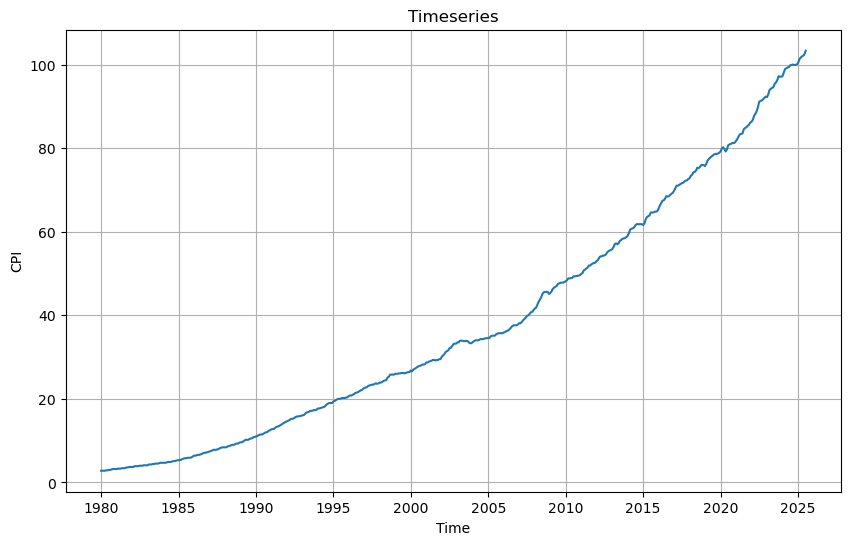

In [11]:
plt.figure(figsize = (10,6))
plt.plot(monthly_data_long.index, monthly_data_long.CPI)

plt.title("CPI ")
plt.xlabel("Time")
plt.ylabel("CPI")
plt.grid(True)

plt.show()

## Step 1 : ADF test to assess stationarity
#### H_0: The time series has a unit root (is non-stationary).
#### H_A: The time series is stationary

In [48]:
new_data = monthly_data_long[:-5]

result = adfuller(new_data)

print('ADF Statistic:', result[0])
print('P-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
        print(f'\t{key}: {value}')

ADF Statistic: 4.419182332809767
P-value: 1.0
Critical Values:
	1%: -3.4427957890025533
	5%: -2.867029512430173
	10%: -2.5696937122646926


#### Fail to reject the null hypothesis thus the time series is non-stationary.



### Apply differencing to obtain stationarity

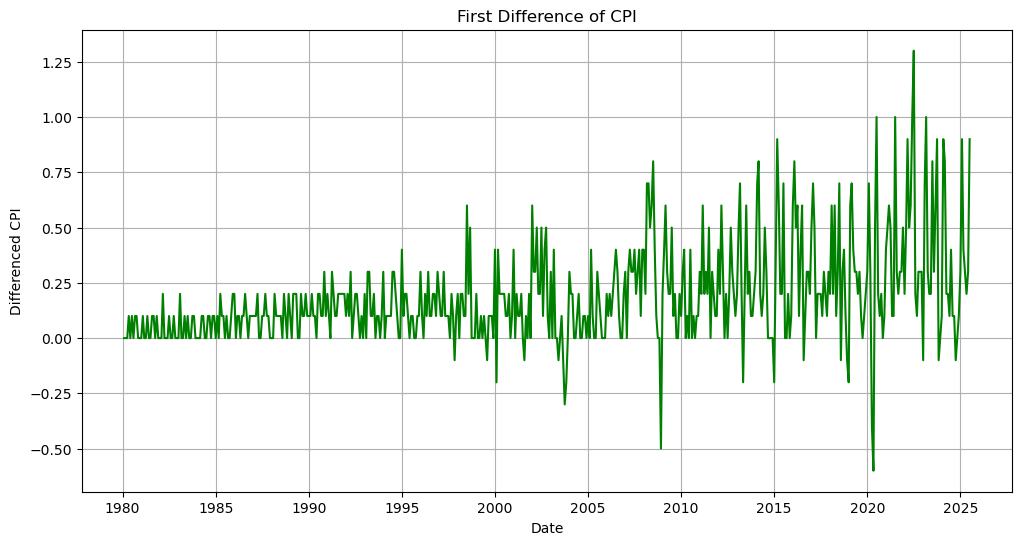

In [13]:
cpi = new_data['CPI']

# First difference
cpi_diff = cpi.diff().dropna()

# Plot differenced series
plt.figure(figsize=(12,6))
plt.plot(cpi_diff, color='green')
plt.title("First Difference of CPI")
plt.xlabel("Date")
plt.ylabel("Differenced CPI")
plt.grid(True)
plt.show()

In [57]:
result = adfuller(cpi_diff)
print("ADF Statistic:", result[0])
print("P-value:", result[1])
print("Critical Values:", result[4])


ADF Statistic: -2.6789473000161075
P-value: 0.07775269149931198
Critical Values: {'1%': -3.442772146350605, '5%': -2.8670191055991836, '10%': -2.5696881663873414}


### Apply second differencing

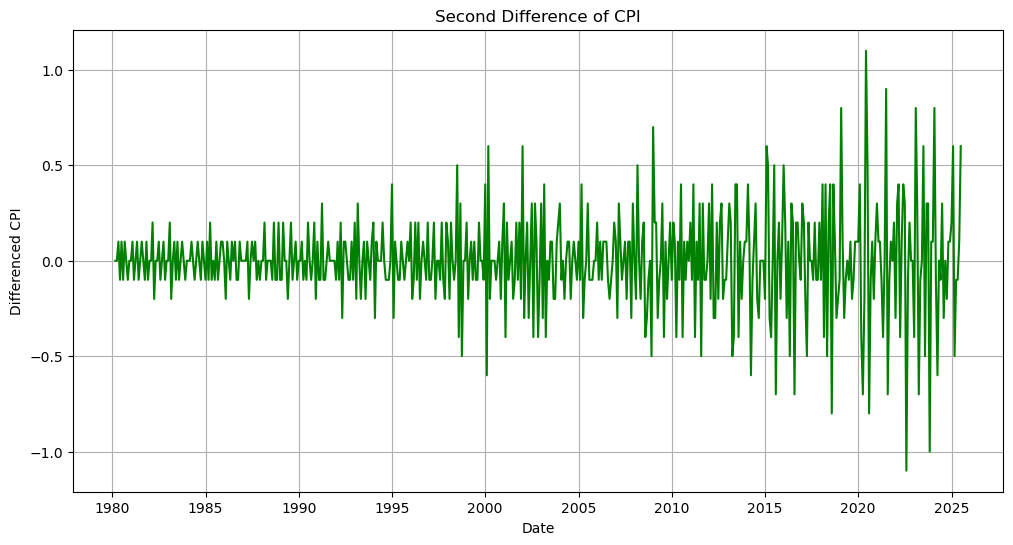

In [14]:
# Second difference - differenced the first difference to obtain stationairity
cpi_diff_2 = cpi_diff.diff().dropna()

# Plot differenced series
plt.figure(figsize=(12,6))
plt.plot(cpi_diff_2, color='green')
plt.title("Second Difference of CPI")
plt.xlabel("Date")
plt.ylabel("Differenced CPI")
plt.grid(True)
plt.show()

In [16]:
result_2 = adfuller(cpi_diff_2)
print("ADF Statistic:", result_2[0])
print("P-value:", result_2[1])
print("Critical Values:", result_2[4])


ADF Statistic: -8.670122470963946
P-value: 4.5703530861173713e-14
Critical Values: {'1%': -3.442772146350605, '5%': -2.8670191055991836, '10%': -2.5696881663873414}


#### small p_val hence it is now stationary

### ACF and PACF of differenced data

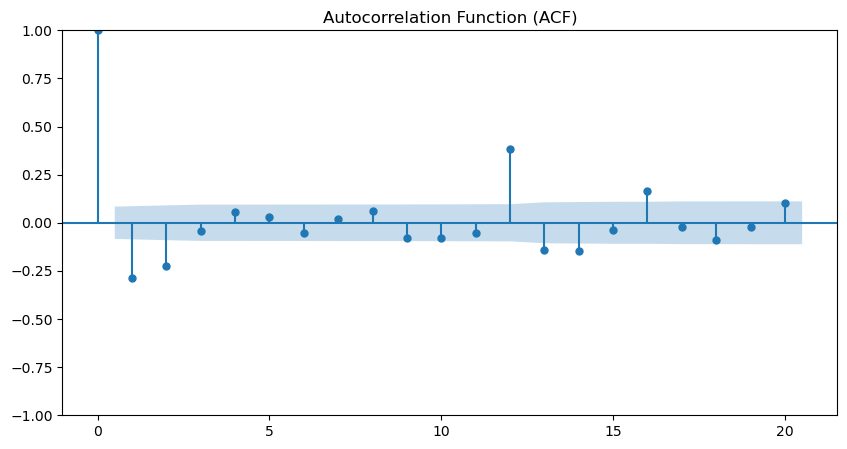

In [17]:
fig, ax = plt.subplots(figsize=(10, 5))
plot_acf(cpi_diff_2, lags=20, ax=ax) # 'lags' specifies the number of lags to plot
ax.set_title("Autocorrelation Function (ACF)")
plt.show()

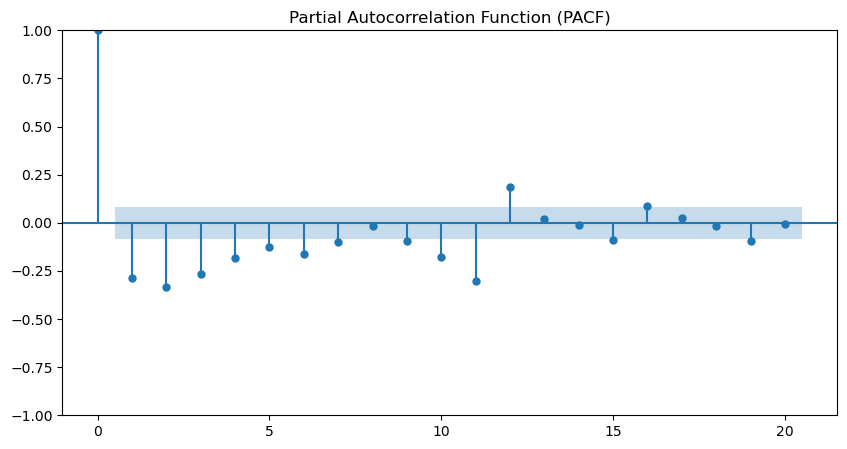

In [18]:
fig, ax = plt.subplots(figsize=(10, 5))
plot_pacf(cpi_diff_2, lags=20, ax=ax, method='ywm') # 'method' can be 'ywm' or 'ols'
ax.set_title("Partial Autocorrelation Function (PACF)")
plt.show()

### ACF and PACF of original time series data

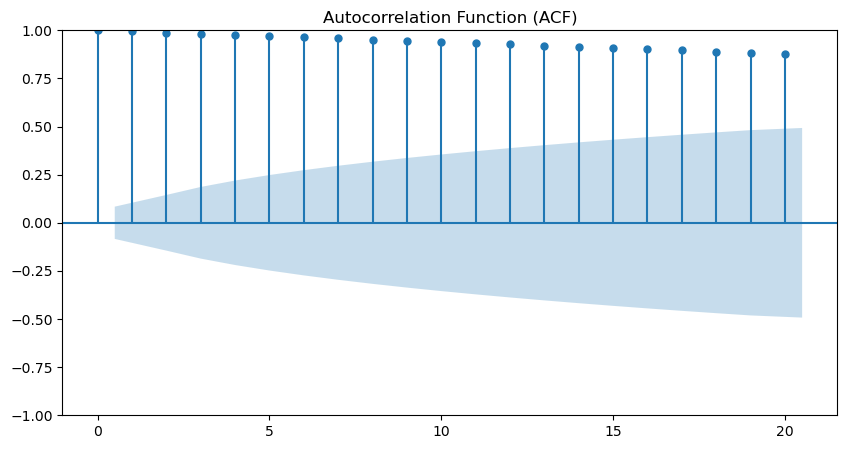

In [19]:
fig, ax = plt.subplots(figsize=(10, 5))
plot_acf(new_data, lags=20, ax=ax) # 'lags' specifies the number of lags to plot
ax.set_title("Autocorrelation Function (ACF)")
plt.show()

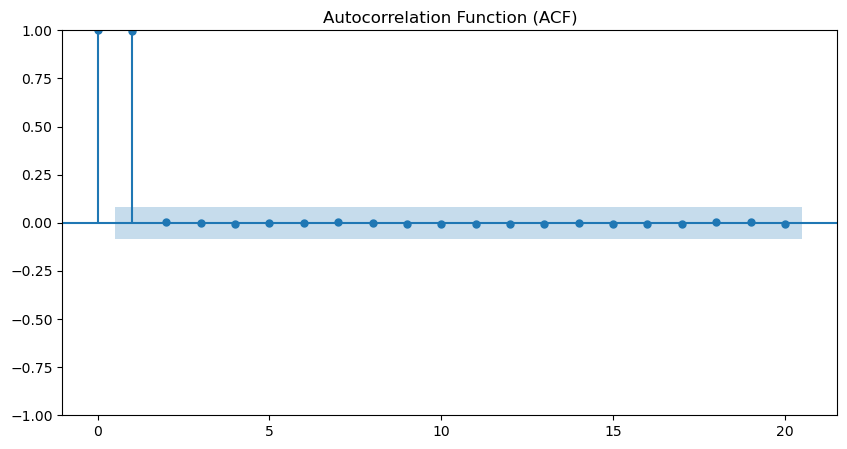

In [20]:
fig, ax = plt.subplots(figsize=(10, 5))
plot_pacf(new_data, lags=20, ax=ax) # 'lags' specifies the number of lags to plot
ax.set_title("Autocorrelation Function (ACF)")
plt.show()

# Model selection and fitting using SARIMAX

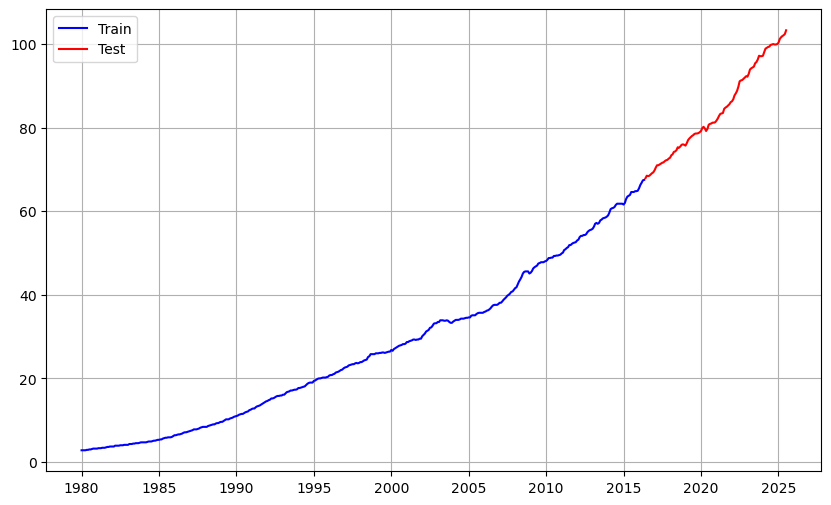

In [49]:
#split data into training and testing
# train_size = int(0.8 * len(cpi_diff_2))

train_size = int(0.8 * len(new_data))
train = new_data[:train_size]
test = new_data[train_size:]

plt.figure(figsize=(10,6))
plt.plot(train, label='Train', color='blue')
plt.plot(test, label='Test', color='red')
plt.legend()
plt.grid(True)
plt.show()

In [22]:

model_auto = auto_arima(train,start_p=2, d=1, start_q=0, max_p=10, max_d=10, max_q=10, start_P=0, D=1, 
                        start_Q=0, max_P=5, 
                        max_D=5, max_Q=5, m=12, seasonal=True, stationary=False,error_action='warn',
                        trace = True, stepwise=True, random_state = 20, n_fits=50, suppress_warnings=True)

print(model_auto.summary())




Performing stepwise search to minimize aic
 ARIMA(2,1,0)(0,1,0)[12]             : AIC=-259.927, Time=0.06 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=-221.914, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=-368.273, Time=0.38 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=-390.685, Time=0.15 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=-252.127, Time=0.05 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=-432.206, Time=0.69 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=-361.935, Time=0.26 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AIC=-430.210, Time=1.69 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=-430.718, Time=3.51 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=-432.209, Time=1.73 sec
 ARIMA(0,1,1)(0,1,3)[12]             : AIC=-430.258, Time=4.01 sec
 ARIMA(0,1,1)(1,1,3)[12]             : AIC=-428.865, Time=6.55 sec
 ARIMA(0,1,0)(0,1,2)[12]             : AIC=-399.115, Time=0.92 sec
 ARIMA(1,1,1)(0,1,2)[12]             : AIC=-446.210, Time=1.85 sec
 ARIMA(1,1,1)(0,1,1

# Model prediction using SARIMAX

In [23]:
predictions = pd.DataFrame(model_auto.predict(n_periods = len(test)), index=test.index)
predictions.columns = ["predicted_CPI"]

print(predictions.head(10))
print(test.head())


            predicted_CPI
Date                     
2016-06-01      67.744434
2016-07-01      68.265836
2016-08-01      68.443290
2016-09-01      68.636517
2016-10-01      68.792858
2016-11-01      68.880548
2016-12-01      68.996390
2017-01-01      69.293091
2017-02-01      69.786401
2017-03-01      70.442177
             CPI
Date            
2016-06-01  67.9
2016-07-01  68.5
2016-08-01  68.4
2016-09-01  68.5
2016-10-01  68.8


In [24]:
print(test.tail(10))


              CPI
Date             
2024-10-01   99.9
2024-11-01   99.9
2024-12-01  100.0
2025-01-01  100.3
2025-02-01  101.2
2025-03-01  101.6
2025-04-01  101.9
2025-05-01  102.1
2025-06-01  102.4
2025-07-01  103.3


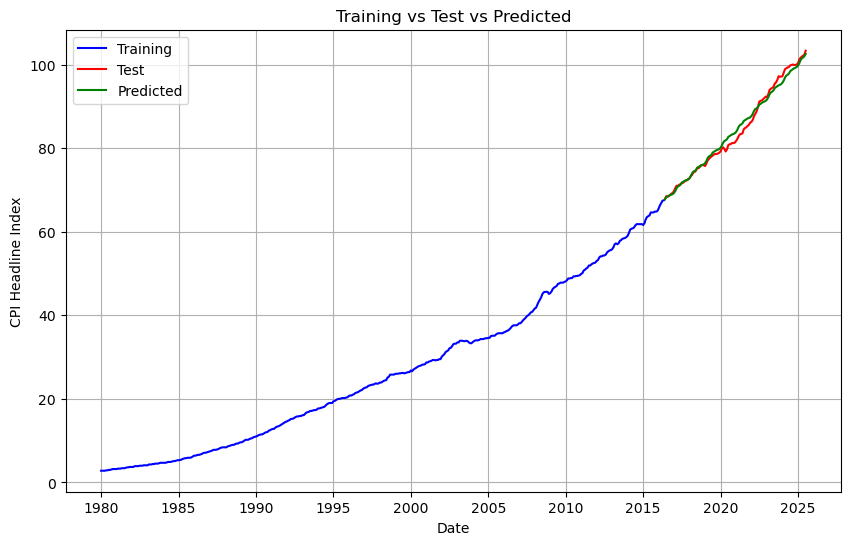

In [25]:
plt.figure(figsize=(10,6))
plt.plot(train, label='Training', color='blue')
plt.plot(test, label='Test', color='red')
plt.plot(predictions, label = 'Predicted', color = 'green')
plt.title("Training vs Test vs Predicted")
plt.xlabel("Date")
plt.ylabel("CPI Headline Index")
plt.legend()
plt.grid(True)
plt.show()

# Model evaluation metrics

In [50]:

print(f"R_2 : {r2_score(test, predictions)}")
print(f"Mean Absolute error : {mean_absolute_error(test, predictions)}")
print(f"Mean Absolute percentage Error : {mean_absolute_percentage_error(test, predictions)}")




R_2 : 0.9868619964116112
Mean Absolute error : 0.9621838269356379
Mean Absolute percentage Error : 0.011144045619313443


# Forecast from August 2025  to December 2025

In [28]:
CPI_data = new_data['CPI']

model = sm.tsa.SARIMAX(CPI_data, order=model_auto.order, seasonal_order=model_auto.seasonal_order)
results = model.fit()

# Get forecast for 5 steps ahead
forecast_steps = 5
forecast_obj = results.get_forecast(steps=forecast_steps)
print(forecast_obj)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.79261D-01    |proj g|=  1.72532D+00

At iterate    5    f= -3.30190D-01    |proj g|=  1.27847D-01


/Users/saalihah/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/saalihah/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   10    f= -3.40981D-01    |proj g|=  5.92086D-03

At iterate   15    f= -3.41374D-01    |proj g|=  1.54108D-02

At iterate   20    f= -3.41556D-01    |proj g|=  4.29465D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     22     27      1     0     0   5.971D-05  -3.416D-01
  F = -0.34155601134062541     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


In [29]:
forecast_mean = forecast_obj.predicted_mean
print("Forecasted values:")
print(forecast_mean)


Forecasted values:
2025-08-01    103.540885
2025-09-01    103.773767
2025-10-01    104.045307
2025-11-01    104.130902
2025-12-01    104.287623
Freq: MS, Name: predicted_mean, dtype: float64


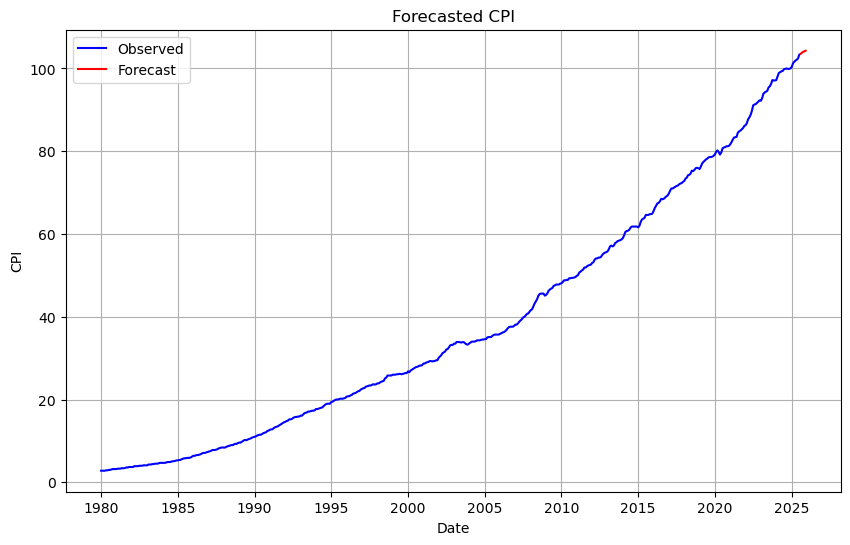

In [30]:
forecast_df = pd.DataFrame({
    'Forecast': forecast_mean,
}, index=forecast_mean.index)


plt.figure(figsize=(10,6))
plt.plot(CPI_data.index, CPI_data, label='Observed', color='blue')
plt.plot(forecast_df.index, forecast_df['Forecast'], label='Forecast', color='red')
plt.title('Forecasted CPI')
plt.xlabel('Date')
plt.ylabel('CPI')
plt.legend()
plt.grid(True)
plt.show()

# Comparison using Prophet

## Model selection and training

In [31]:
train_size = int(0.8 * len(monthly_data_long))
train2 = monthly_data_long[:train_size].dropna()
test2 = monthly_data_long[train_size:].dropna()
test2.shape

(106, 1)

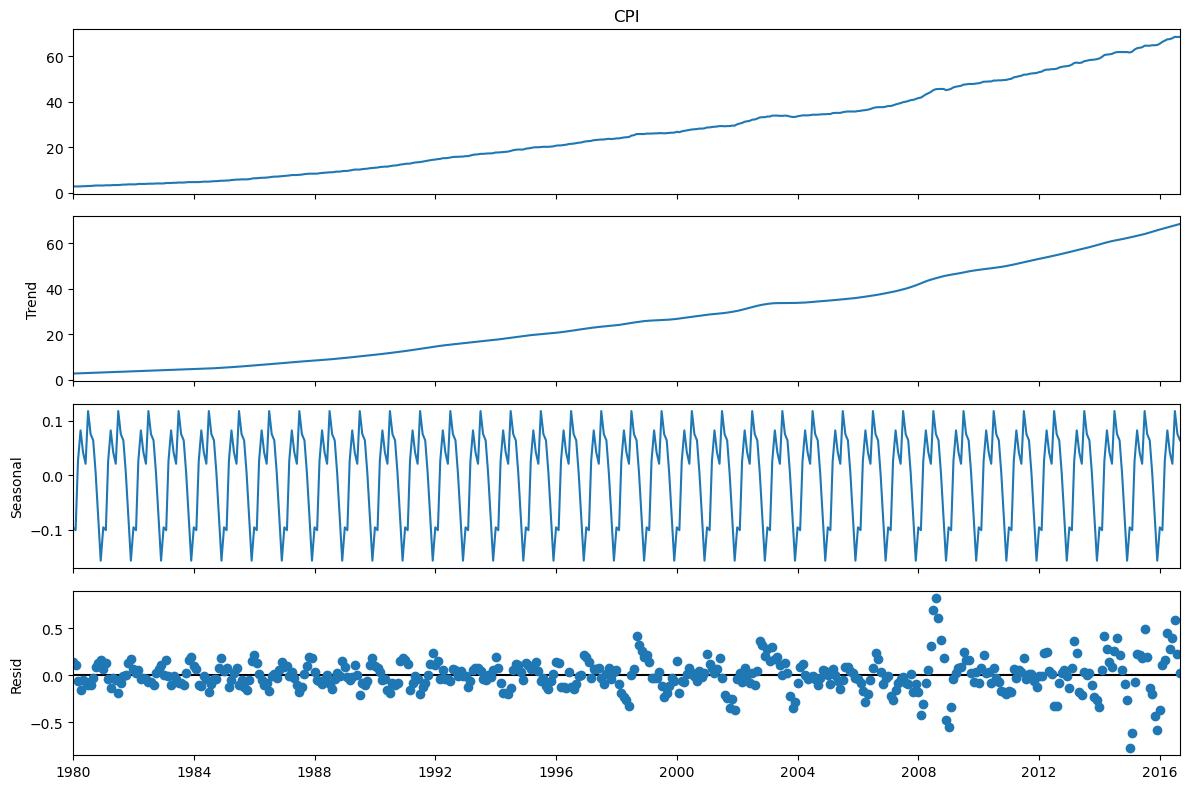

In [32]:
from statsmodels.tsa.seasonal import seasonal_decompose

decompose = seasonal_decompose(train2["CPI"], model='additive', extrapolate_trend='freq', period=12)

decompose.plot().set_size_inches(12, 8) 
plt.tight_layout()
plt.show()

In [33]:
train_prophet = train2.copy()
train_prophet = train2.reset_index()
train_prophet = train_prophet.rename(columns={"Date": "ds", "CPI": "y"})

test_prophet = test2.copy()
test_prophet = test2.reset_index()
test_prophet = test_prophet.rename(columns={"Date": "ds", "CPI": "y"})


In [34]:
from prophet import Prophet
model_prophet  = Prophet()
model_prophet.fit(train_prophet)

13:52:20 - cmdstanpy - INFO - Chain [1] start processing
13:52:20 - cmdstanpy - INFO - Chain [1] done processing


In [35]:
df_future = model_prophet.make_future_dataframe(periods=len(test_prophet), freq='MS')


(547, 1)

In [36]:
forecast_prophet = model_prophet.predict(df_future)
forecast_prophet[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].round().tail()

,ds,yhat,yhat_lower,yhat_upper
542,2025-03-01,92.0,87.0,97.0
543,2025-04-01,93.0,87.0,98.0
544,2025-05-01,93.0,87.0,98.0
545,2025-06-01,93.0,87.0,98.0
546,2025-07-01,93.0,88.0,99.0


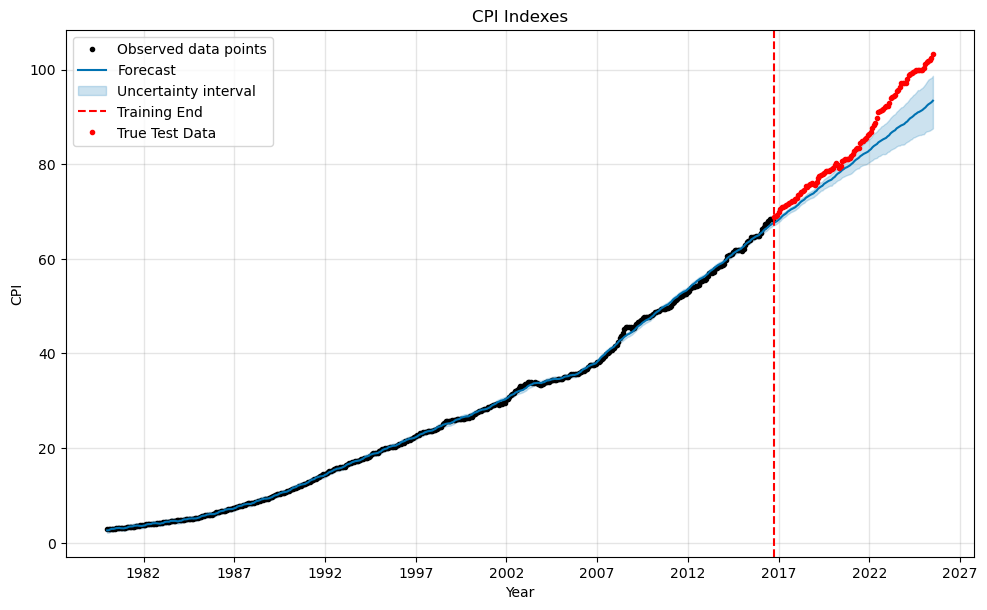

In [51]:
forecast_plot = model_prophet.plot(forecast_prophet)

axes = forecast_plot.gca()
last_training_date = forecast_prophet['ds'].iloc[-len(test_prophet)]
axes.axvline(x=last_training_date, color='red', linestyle='--', label='Training End')

test_prophet['ds'] = pd.to_datetime(test_prophet['ds'])
plt.plot(test_prophet['ds'], test_prophet['y'],'ro', markersize=3, label='True Test Data')

plt.ylabel("CPI")
plt.xlabel("Year")
plt.title("CPI Indexes")

plt.legend()

In [38]:
forecast_test = forecast_prophet.set_index("ds").loc[test_prophet["ds"], "yhat"]

y_true = test_prophet["y"].values
y_pred = forecast_test.values


In [39]:
print(f"r_2 : {r2_score(y_true, y_pred)}")
print(f"Mean Absolute error : {mean_absolute_error(y_true, y_pred)}")
print(f"Mean Absolute percentage Error : {mean_absolute_percentage_error(y_true, y_pred)}")


r_2 : 0.7356888804507352
Mean Absolute error : 4.342034637033902
Mean Absolute percentage Error : 0.04798559412696587
